# Analysis 

**Overview of Notebook:** 
- Initial data viz/data explorations
- Train-test-split data
- Parametric modeling (linear regressiona and logistic)
- Nonparametric modeling (decision tree and random forest)
- Resulting Graphs 

In [1]:
# set up 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

%xmode Minimal

Exception reporting mode: Minimal


### Load Data

In [2]:
%store -r local_cl
%store -r local_dummied

In [3]:
local_dummied.head()
local_dummied.info()
local_dummied.columns
local_dummied.shape
local_dummied.describe()

,county_fips,county_name,state_fips,total,prop_wom,prop_men,prop_unknown,total_population,cvap,white_pct,...,DIVISIONS_west_south_central,ruralurban_cc_1.0,ruralurban_cc_2.0,ruralurban_cc_3.0,ruralurban_cc_4.0,ruralurban_cc_5.0,ruralurban_cc_6.0,ruralurban_cc_7.0,ruralurban_cc_8.0,ruralurban_cc_9.0
0,01001,AUTAUGA,01,6.0,0.667,0.333,0.000,55049.0,40690.0,0.757,...,0,0,1,0,0,0,0,0,0,0
1,01003,BALDWIN,01,16.0,0.375,0.562,0.062,199510.0,151770.0,0.832,...,0,0,0,1,0,0,0,0,0,0
2,01005,BARBOUR,01,15.0,0.267,0.600,0.133,26614.0,20375.0,0.459,...,0,0,0,0,0,0,1,0,0,0
3,01007,BIBB,01,10.0,0.400,0.600,0.000,22572.0,17590.0,0.748,...,0,1,0,0,0,0,0,0,0,0
4,01009,BLOUNT,01,9.0,0.333,0.556,0.111,57704.0,42430.0,0.877,...,0,1,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1251
Data columns (total 94 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county_fips                   1083 non-null   object 
 1   county_name                   1083 non-null   object 
 2   state_fips                    1083 non-null   object 
 3   total                         1083 non-null   float64
 4   prop_wom                      1083 non-null   float64
 5   prop_men                      1083 non-null   float64
 6   prop_unknown                  1083 non-null   float64
 7   total_population              1083 non-null   float64
 8   cvap                          1083 non-null   float64
 9   white_pct                     1083 non-null   float64
 10  black_pct                     1083 non-null   float64
 11  hispanic_pct                  1083 non-null   float64
 12  nonwhite_pct                  1083 non-null   float64
 13  for

Index(['county_fips', 'county_name', 'state_fips', 'total', 'prop_wom',
       'prop_men', 'prop_unknown', 'total_population', 'cvap', 'white_pct',
       'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct',
       'female_pct', 'age29andunder_pct', 'age65andolder_pct',
       'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
       'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct',
       'median_hh_inc', 'pres_16_CLINTON', 'pres_16_THIRD', 'pres_16_TRUMP',
       'pres_12_OBAMA', 'pres_12_ROMNEY', 'no_wom_demand_contracep_pub',
       'total_titlex_clinics', 'no_wom_dem_contracep_13',
       'no_wom_dem_contracep_20', 'total_pub_clinics', 'DUM_no_PP_clinics',
       'DUM_no_PP_clinics_titlex', 'DUM_no_fed_centers',
       'DUM_no_fed_centers_titlex', 'DUM_no_HD_clinics',
       'DUM_no_HD_clinics_titlex', 'DUM_no_hosp_clinics',
       'DUM_no_hosp_clinics_titlex', 'DUM_no_other_clinics',
       'DUM_no_other_clinics_titlex', 'state_clean_ALABAMA',
       'state

(1083, 94)

,total,prop_wom,prop_men,prop_unknown,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,...,DIVISIONS_west_south_central,ruralurban_cc_1.0,ruralurban_cc_2.0,ruralurban_cc_3.0,ruralurban_cc_4.0,ruralurban_cc_5.0,ruralurban_cc_6.0,ruralurban_cc_7.0,ruralurban_cc_8.0,ruralurban_cc_9.0
count,1083.000000,1083.000000,1083.000000,1083.000000,1.083000e+03,1.083000e+03,1083.000000,1083.000000,1083.000000,1083.000000,...,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,22.956602,0.300572,0.650877,0.048546,1.150055e+05,8.287594e+04,0.767733,0.117197,0.063471,0.232267,...,0.059095,0.154201,0.140351,0.119114,0.086796,0.035088,0.177285,0.143121,0.067405,0.076639
std,42.572315,0.227931,0.230763,0.068865,2.943156e+05,1.993996e+05,0.190265,0.166876,0.086555,0.190265,...,0.235912,0.361308,0.347511,0.324072,0.281666,0.184087,0.382086,0.350358,0.250839,0.266141
min,1.000000,0.000000,0.000000,0.000000,8.460000e+02,6.800000e+02,0.132000,0.000000,0.000000,0.004000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.167000,0.533000,0.000000,1.627800e+04,1.259000e+04,0.650500,0.009000,0.016000,0.075500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,0.273000,0.667000,0.000000,3.602900e+04,2.736000e+04,0.827000,0.038000,0.034000,0.173000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.500000,0.400000,0.778000,0.082500,9.285550e+04,7.047750e+04,0.924500,0.156000,0.071000,0.349500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,720.000000,1.000000,1.000000,0.400000,5.227575e+06,3.511325e+06,0.996000,0.862000,0.832000,0.868000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Initial Data Viz

In [4]:
# Explore distribution of the proportion of women candidates
local_dummied.prop_wom.describe()

count    1083.000000
mean        0.300572
std         0.227931
min         0.000000
25%         0.167000
50%         0.273000
75%         0.400000
max         1.000000
Name: prop_wom, dtype: float64

(array([159.,  21.,  76.,  74., 124., 155., 117.,  83.,  68.,  15.,  85.,
         21.,   7.,  19.,   3.,   5.,   3.,   0.,   0.,  48.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Percentage of Local Candidates that are Women')

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Data from 1083 Counties in 28 States from the 2018 General Elections')

Text(0.5, 1, 'Distribution of the Proportion of Local Candidates that are Women')

Text(0.32, 140, 'Mean: 0.30')

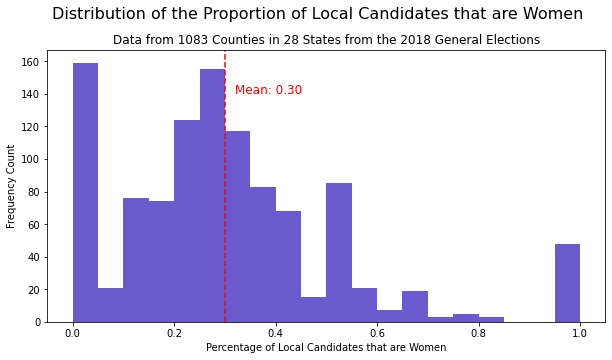

In [5]:
# Histogram of prop_women distribution
fig1 = plt.figure(figsize=(10,5))
plt.hist(local_dummied.prop_wom, bins = 20, color = 'slateblue')
plt.xlabel('Percentage of Local Candidates that are Women')
plt.ylabel('Frequency Count')
plt.title('Data from 1083 Counties in 28 States from the 2018 General Elections')
plt.suptitle('Distribution of the Proportion of Local Candidates that are Women',fontsize=16, y = 1)
plt.axvline(x=0.30, color = 'red', linestyle = 'dashed')
plt.text(0.32, 140, "Mean: 0.30", fontsize=12, color = 'red')
plt.show()
#fig1.savefig('prop_wom_hist.png')

In [6]:
# Explore proportion by state
state_median = local_cl.groupby('state_clean')["prop_wom"].median().reset_index()
state_median = state_median.sort_values(by = 'prop_wom', ascending = False).reset_index()
state_median = state_median.drop('index', axis=1)
state_median.columns = ['state', 'median_prop_wom']
state_median
#round(state_median.median_prop_wom.mean(),3)

,state,median_prop_wom
0,CONNECTICUT,0.6570
1,ILLINOIS,0.5000
2,NEW JERSEY,0.4060
3,MONTANA,0.3875
4,RHODE ISLAND,0.3835
5,MISSISSIPPI,0.3750
6,MAINE,0.3540
7,HAWAII,0.3500
8,NEVADA,0.3455
9,ARIZONA,0.3270


<BarContainer object of 28 artists>

Text(0.5, 0, 'Median Proportion of Women Candidates')

Text(0.5, 1.0, 'Data from 1083 Counties in 28 States from the 2018 General Elections')

Text(0.5, 0.98, 'Median Proportion of Women Candidates for Local Election')

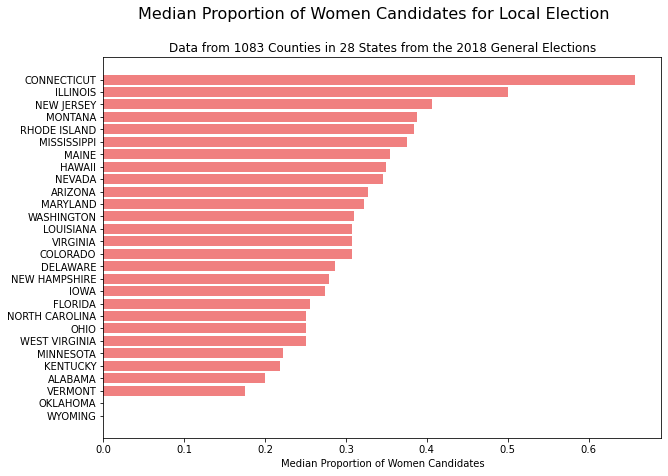

In [7]:
# Plot
fig2, ax = plt.subplots(figsize = (10,7))
ax.barh(state_median.state, state_median.median_prop_wom, align='center', color = 'lightcoral')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Median Proportion of Women Candidates')
plt.title('Data from 1083 Counties in 28 States from the 2018 General Elections')
plt.suptitle('Median Proportion of Women Candidates for Local Election',fontsize=16)
#fig2.savefig('prop_wom_bystate.png')

In [8]:
# Explore a key continuous features
example_variables = ['prop_wom','white_pct','black_pct', 'hispanic_pct','foreignborn_pct', 
                    'age29andunder_pct','age65andolder_pct', 'rural_pct', 'female_pct','clf_unemploy_pct',
                    'median_hh_inc', 'total_pub_clinics','total_titlex_clinics',
                     'no_wom_demand_contracep_pub','no_wom_dem_contracep_13','no_wom_dem_contracep_20']

for i in example_variables:
    local_dummied[i].describe()

count    1083.000000
mean        0.300572
std         0.227931
min         0.000000
25%         0.167000
50%         0.273000
75%         0.400000
max         1.000000
Name: prop_wom, dtype: float64

count    1083.000000
mean        0.767733
std         0.190265
min         0.132000
25%         0.650500
50%         0.827000
75%         0.924500
max         0.996000
Name: white_pct, dtype: float64

count    1083.000000
mean        0.117197
std         0.166876
min         0.000000
25%         0.009000
50%         0.038000
75%         0.156000
max         0.862000
Name: black_pct, dtype: float64

count    1083.000000
mean        0.063471
std         0.086555
min         0.000000
25%         0.016000
50%         0.034000
75%         0.071000
max         0.832000
Name: hispanic_pct, dtype: float64

count    1083.000000
mean        0.043286
std         0.051814
min         0.000000
25%         0.012500
50%         0.027000
75%         0.054000
max         0.522000
Name: foreignborn_pct, dtype: float64

count    1083.000000
mean        0.373023
std         0.050056
min         0.136000
25%         0.344000
50%         0.370000
75%         0.398000
max         0.674000
Name: age29andunder_pct, dtype: float64

count    1083.000000
mean        0.171920
std         0.041579
min         0.070000
25%         0.146000
50%         0.170000
75%         0.192000
max         0.531000
Name: age65andolder_pct, dtype: float64

count    1083.00000
mean        0.54813
std         0.30975
min         0.00000
25%         0.29550
50%         0.55200
75%         0.80000
max         1.00000
Name: rural_pct, dtype: float64

count    1083.000000
mean        0.502453
std         0.020760
min         0.348000
25%         0.498500
50%         0.506000
75%         0.513000
max         0.559000
Name: female_pct, dtype: float64

count    1083.000000
mean        0.079281
std         0.031290
min         0.000000
25%         0.058500
50%         0.076000
75%         0.095000
max         0.261000
Name: clf_unemploy_pct, dtype: float64

count      1083.000000
mean      47023.056325
std       13410.690008
min       18972.000000
25%       38089.500000
50%       44845.000000
75%       53179.500000
max      125672.000000
Name: median_hh_inc, dtype: float64

count    1083.000000
mean        3.843952
std         7.565159
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       175.000000
Name: total_pub_clinics, dtype: float64

count    1083.000000
mean        1.499538
std         2.116468
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        36.000000
Name: total_titlex_clinics, dtype: float64

count      1083.00000
mean       7415.31856
std       19621.24934
min          30.00000
25%         950.00000
50%        2240.00000
75%        6270.00000
max      345310.00000
Name: no_wom_demand_contracep_pub, dtype: float64

count      1083.000000
mean      14303.370268
std       39441.908353
min          50.000000
25%        1545.000000
50%        3750.000000
75%       10735.000000
max      715650.000000
Name: no_wom_dem_contracep_13, dtype: float64

count      1083.000000
mean      12657.673130
std       35410.119348
min          40.000000
25%        1335.000000
50%        3230.000000
75%        9325.000000
max      645830.000000
Name: no_wom_dem_contracep_20, dtype: float64

In [9]:
# Explore key dummy variables
dummies = ['pres_16_CLINTON','pres_16_THIRD','pres_16_TRUMP', 'pres_12_OBAMA','pres_12_ROMNEY']

for i in dummies:
    result = local_dummied.groupby(i).size().reset_index()
    result.columns = [i, 'count']
    result['percentage'] = round((result['count']/len(local_dummied)),3)
    final = result.iloc[1]
    print(final)
    

pres_16_CLINTON      1.0
count              217.0
percentage           0.2
Name: 1, dtype: float64
pres_16_THIRD    1.000
count            3.000
percentage       0.003
Name: 1, dtype: float64
pres_16_TRUMP      1.000
count            863.000
percentage         0.797
Name: 1, dtype: float64
pres_12_OBAMA      1.000
count            306.000
percentage         0.283
Name: 1, dtype: float64
pres_12_ROMNEY      1.000
count             777.000
percentage          0.717
Name: 1, dtype: float64


### Train_Test_Split

In [10]:
# create feature matrix
x = local_dummied[['total','total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct', 
                   'foreignborn_pct', 'female_pct', 'age29andunder_pct', 'age65andolder_pct',
                   'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct', 'lesshs_whites_pct', 
                   'lesscollege_whites_pct', 'rural_pct', 'median_hh_inc', 'pres_16_CLINTON', 'pres_16_THIRD', 
                   'pres_16_TRUMP', 'pres_12_OBAMA', 'pres_12_ROMNEY', 'no_wom_demand_contracep_pub',
                   'total_titlex_clinics', 'no_wom_dem_contracep_13','no_wom_dem_contracep_20', 
                   'total_pub_clinics', 'DUM_no_PP_clinics','DUM_no_PP_clinics_titlex', 'DUM_no_fed_centers',
                   'DUM_no_fed_centers_titlex', 'DUM_no_HD_clinics','DUM_no_HD_clinics_titlex', 'DUM_no_hosp_clinics',
                   'DUM_no_hosp_clinics_titlex', 'DUM_no_other_clinics','DUM_no_other_clinics_titlex', 
                   'state_clean_ALABAMA', 'state_clean_ARIZONA','state_clean_COLORADO', 'state_clean_CONNECTICUT',
                   'state_clean_DELAWARE', 'state_clean_FLORIDA', 'state_clean_HAWAII','state_clean_ILLINOIS', 
                   'state_clean_IOWA', 'state_clean_KENTUCKY','state_clean_LOUISIANA', 'state_clean_MAINE', 
                   'state_clean_MARYLAND','state_clean_MINNESOTA', 'state_clean_MISSISSIPPI','state_clean_MONTANA', 
                   'state_clean_NEVADA','state_clean_NEW HAMPSHIRE', 'state_clean_NEW JERSEY',
                   'state_clean_NORTH CAROLINA', 'state_clean_OHIO','state_clean_OKLAHOMA', 
                   'state_clean_RHODE ISLAND','state_clean_VERMONT', 'state_clean_VIRGINIA', 'state_clean_WASHINGTON',
                   'state_clean_WEST VIRGINIA', 'state_clean_WYOMING', 'REGION_midwest', 'REGION_northeast', 
                   'REGION_south','REGION_west', 'DIVISIONS_east_north_central', 'DIVISIONS_east_south_central',
                   'DIVISIONS_middle_atlantic', 'DIVISIONS_mountain', 'DIVISIONS_new_england', 'DIVISIONS_pacific', 
                   'DIVISIONS_south_atlantic', 'DIVISIONS_west_north_central', 'DIVISIONS_west_south_central', 
                   'ruralurban_cc_1.0','ruralurban_cc_2.0','ruralurban_cc_3.0', 'ruralurban_cc_4.0', 
                   'ruralurban_cc_5.0','ruralurban_cc_6.0', 'ruralurban_cc_7.0', 'ruralurban_cc_8.0',
                   'ruralurban_cc_9.0']]

len(x.columns)

# new target array
y = local_dummied['prop_wom']

# new train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

88

### Parametric Models

#### Set up

In [11]:
# Fit model function 
def get_fit(model, xtrain, ytrain):
    '''input a model type and x and y training data
    fits the model'''
    new_model = model.fit(xtrain, ytrain)
    return new_model

In [12]:
# Scoring models function
def get_score(model, model_name, xtest, ytest):
    '''input a model type, model string name, data_name and x and y testing data
    prints the score '''
    result = model.score(xtest, ytest)
    return (f'{model_name}'+" score : " + str(round(result,3)))

#### Running Models

In [13]:
# Linear Regression

# load model
lm = LinearRegression()

# fit
get_fit(lm, x_train, y_train)

# score
get_score(model = lm, model_name = 'linear', xtest = x_test , ytest = y_test)

LinearRegression()

'linear score : 0.101'

In [14]:
# Define LASSOs with different alphas
lasso1 = Lasso(alpha = 1, fit_intercept = False)
lasso2 = Lasso(alpha = 5, fit_intercept = False)
lasso3 = Lasso(alpha = 10, fit_intercept = False)

In [15]:
# get fit and scores for each type of alpha
lasso_1 = get_fit(lasso1, x_train, y_train)
get_score(model = lasso1, model_name = 'LASSO 1', xtest = x_test , ytest = y_test)

lasso_2 = get_fit(lasso2, x_train, y_train)
get_score(model = lasso2, model_name = 'LASSO 2', xtest = x_test , ytest = y_test)

lasso_3 = get_fit(lasso3, x_train, y_train)
get_score(model = lasso3, model_name = 'LASSO 3', xtest = x_test , ytest = y_test)

/Users/maggiesullivan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+01, tolerance: 1.040e-02
  model = cd_fast.enet_coordinate_descent(


'LASSO 1 score : -0.17'

/Users/maggiesullivan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+01, tolerance: 1.040e-02
  model = cd_fast.enet_coordinate_descent(


'LASSO 2 score : -0.172'

/Users/maggiesullivan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.166e+00, tolerance: 1.040e-02
  model = cd_fast.enet_coordinate_descent(


'LASSO 3 score : -0.174'

In [16]:
# Although our scores were not successful, let's see if any coefficients were shrunk
lasso_test_comp = pd.DataFrame({'variable': x.columns, 'lasso_1_coef': lasso_1.coef_, 
                               'lasso_2_coef': lasso_2.coef_, 'lasso_3_coef': lasso_3.coef_})
#lasso_test_comp

In [17]:
# Identify shrunk predictors
for i in ['lasso_1_coef', 'lasso_2_coef', 'lasso_3_coef']: 
    shrunk_predictors = lasso_test_comp[lasso_test_comp[i]==0]
    print(f'{i} shrunk predictors: ' + str(len(shrunk_predictors)))
    lasso_top = lasso_test_comp[lasso_test_comp[i]!=0]
    print(f'{i} top predictors: ' + str(len(lasso_top)))
    print(lasso_top)

lasso_1_coef shrunk predictors: 82
lasso_1_coef top predictors: 6
                       variable  lasso_1_coef  lasso_2_coef  lasso_3_coef
1              total_population -5.152995e-07 -4.471473e-07 -4.308097e-07
2                          cvap  4.535302e-07  3.870787e-07  3.309884e-07
17                median_hh_inc  5.865145e-06  5.851659e-06  5.859078e-06
23  no_wom_demand_contracep_pub  6.582644e-06  5.948848e-06  5.047430e-06
25      no_wom_dem_contracep_13 -4.996416e-06 -1.530343e-06 -9.212373e-07
26      no_wom_dem_contracep_20  3.703820e-06  0.000000e+00 -0.000000e+00
lasso_2_coef shrunk predictors: 83
lasso_2_coef top predictors: 5
                       variable  lasso_1_coef  lasso_2_coef  lasso_3_coef
1              total_population -5.152995e-07 -4.471473e-07 -4.308097e-07
2                          cvap  4.535302e-07  3.870787e-07  3.309884e-07
17                median_hh_inc  5.865145e-06  5.851659e-06  5.859078e-06
23  no_wom_demand_contracep_pub  6.582644e-06  5.94884

In [18]:
# Create remaining predictors into a df
df = lasso_test_comp[lasso_test_comp['variable'].isin(['total_population', 'cvap','median_hh_inc', 
                                                       'no_wom_demand_contracep_pub', 'no_wom_dem_contracep_13', 
                                                       'no_wom_dem_contracep_20'])]

df.set_index('variable', inplace=True)

df

,lasso_1_coef,lasso_2_coef,lasso_3_coef
variable,,,
total_population,-5.152995e-07,-4.471473e-07,-4.308097e-07
cvap,4.535302e-07,3.870787e-07,3.309884e-07
median_hh_inc,5.865145e-06,5.851659e-06,5.859078e-06
no_wom_demand_contracep_pub,6.582644e-06,5.948848e-06,5.047430e-06
no_wom_dem_contracep_13,-4.996416e-06,-1.530343e-06,-9.212373e-07
no_wom_dem_contracep_20,3.703820e-06,0.000000e+00,-0.000000e+00


Text(0.5, 0, 'Coefficient')

Text(0, 0.5, '')

[Text(0, 0, 'Total Population'),
 Text(0, 1, 'Citizen Voting Age Population'),
 Text(0, 2, 'Median Household Income'),
 Text(0, 3, '# of Women Needing Publicly-Funded Contraceptives'),
 Text(0, 4, '# of Women 13+ Needing Contraceptives'),
 Text(0, 5, '# of Women 20+ Needing Contraceptives')]

Text(0.5, 1.0, 'Top Features Based on LASSO Regression')

(-7.5e-06, 1e-05)

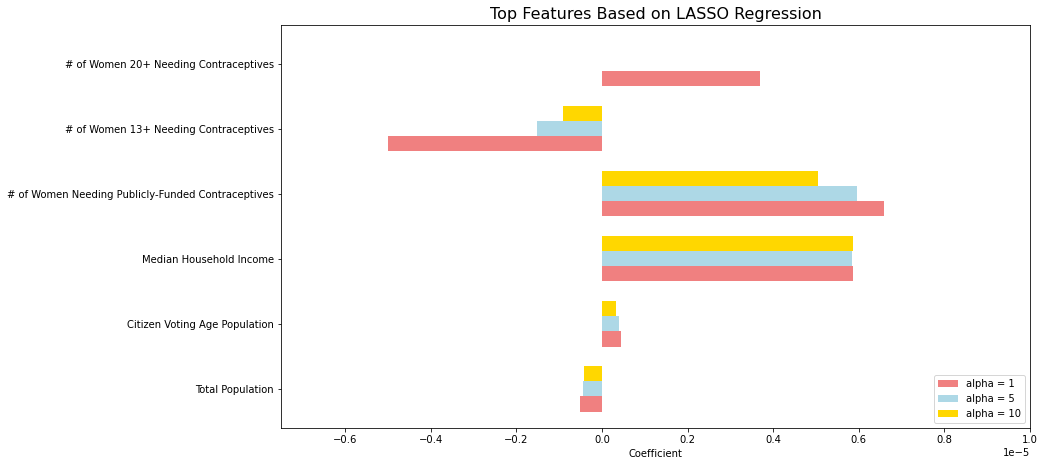

In [19]:
# plot the coefficients of the remaining variables
ax = df.plot(kind='barh', width=0.70, figsize =(13, 7), color = ['lightcoral', 'lightblue','gold'])

# Set the x-axis label, y-axis label, and chart title
ax.set_xlabel('Coefficient')
ax.set_ylabel('')
ax.set_yticklabels(['Total Population', 'Citizen Voting Age Population', 'Median Household Income',
                    '# of Women Needing Publicly-Funded Contraceptives',
                    '# of Women 13+ Needing Contraceptives','# of Women 20+ Needing Contraceptives'])
ax.set_title('Top Features Based on LASSO Regression',fontsize=16)
#ax.axvline(x=0, color = 'black', linestyle = 'solid')

# Set the position of each group of bars
ax.set_position([0.1, 0.1, 0.8, 0.8])
ax.legend(['alpha = 1', 'alpha = 5', 'alpha = 10'], loc='lower right')

ax.set_xlim(-0.0000075, 0.00001)
#ax.ticklabel_format(style='plain')

plt.show()

### Step 4: Non-Parametric Models

In [20]:
tree = DecisionTreeRegressor(random_state=1)

In [21]:
# create definition to get fit and features 
def score_and_features(tree, xtrain, ytrain, xtest, ytest):
    new_tree = tree.fit(xtrain, ytrain)
    feature_df = pd.DataFrame({'Feature': xtest.columns, 'Importance': new_tree.feature_importances_})
    top_10 = feature_df.sort_values(by = 'Importance', ascending = False).head(10)
    return (round(new_tree.score(xtest, ytest),3), top_10)

In [22]:
# Initial tree
score_and_features(tree, x_train, y_train, x_test, y_test)

(-0.571,
                  Feature  Importance
 0                  total    0.096013
 14     lesshs_whites_pct    0.086446
 17         median_hh_inc    0.085972
 11      clf_unemploy_pct    0.063329
 9      age29andunder_pct    0.060365
 4              black_pct    0.058940
 45  state_clean_ILLINOIS    0.044834
 10     age65andolder_pct    0.042682
 13       lesscollege_pct    0.042323
 7        foreignborn_pct    0.042192)

#### Hyper Parameter Tuning

([<matplotlib.axis.XTick at 0x7fbb401d92b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Maximum Depth')

Text(0, 0.5, 'Score (R2)')

Text(0.5, 1.0, 'Decision Tree Validation Curve')

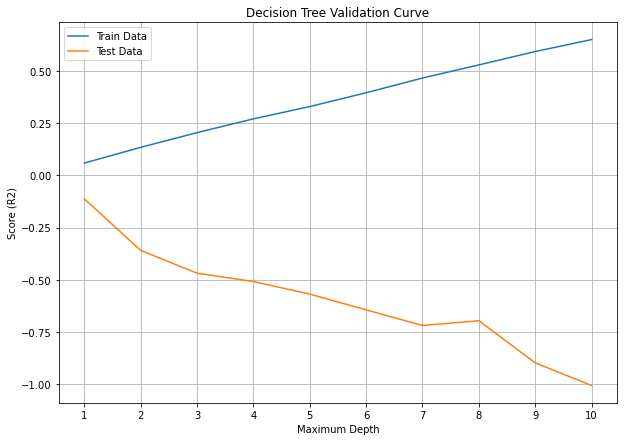

In [23]:
# create parameters
depth_range = np.arange(1,11)
train_scores, test_scores = validation_curve(tree, x, y, param_name ='max_depth', 
                                             param_range = depth_range, cv = 10)

# find means
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# plot
max_depth = np.arange(1,11)
fig1 = plt.figure(figsize = (10,7))
plt.plot(max_depth, train_mean, label='Train Data')
plt.plot(max_depth, test_mean, label='Test Data')
plt.grid(True)
plt.xticks(np.arange(1,11, step = 1))
plt.xlabel('Maximum Depth')
plt.ylabel('Score (R2)')
plt.title('Decision Tree Validation Curve')
plt.legend()
plt.show()

#fig1.savefig('dt_validation_curve')

(0.071,
                       Feature  Importance
 4                   black_pct    0.228703
 45       state_clean_ILLINOIS    0.220467
 17              median_hh_inc    0.209460
 15     lesscollege_whites_pct    0.131503
 25    no_wom_dem_contracep_13    0.114130
 14          lesshs_whites_pct    0.083717
 10          age65andolder_pct    0.012022
 66             REGION_midwest    0.000000
 65        state_clean_WYOMING    0.000000
 64  state_clean_WEST VIRGINIA    0.000000)

<Figure size 2160x720 with 0 Axes>

[Text(0.5, 0.875, 'state_clean_ILLINOIS <= 0.5\nsquared_error = 0.051\nsamples = 758\nvalue = 0.293'),
 Text(0.25, 0.625, 'lesscollege_whites_pct <= 0.701\nsquared_error = 0.042\nsamples = 714\nvalue = 0.281'),
 Text(0.125, 0.375, 'lesshs_whites_pct <= 0.021\nsquared_error = 0.048\nsamples = 160\nvalue = 0.352'),
 Text(0.0625, 0.125, 'squared_error = 0.064\nsamples = 5\nvalue = 0.71'),
 Text(0.1875, 0.125, 'squared_error = 0.043\nsamples = 155\nvalue = 0.341'),
 Text(0.375, 0.375, 'no_wom_dem_contracep_13 <= 595.0\nsquared_error = 0.039\nsamples = 554\nvalue = 0.261'),
 Text(0.3125, 0.125, 'squared_error = 0.089\nsamples = 23\nvalue = 0.455'),
 Text(0.4375, 0.125, 'squared_error = 0.035\nsamples = 531\nvalue = 0.252'),
 Text(0.75, 0.625, 'black_pct <= 0.005\nsquared_error = 0.16\nsamples = 44\nvalue = 0.486'),
 Text(0.625, 0.375, 'age65andolder_pct <= 0.171\nsquared_error = 0.014\nsamples = 7\nvalue = 0.952'),
 Text(0.5625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.667'),
 Te

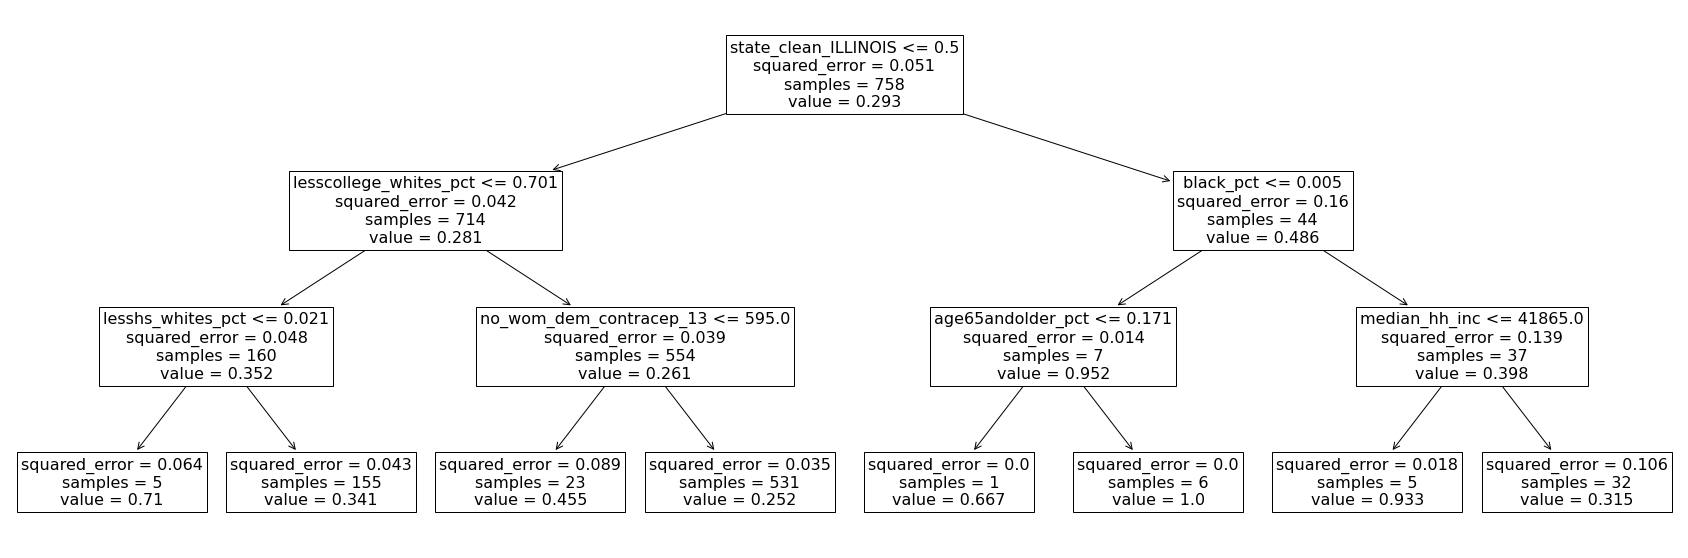

In [24]:
# Let's do a maxdepth of 3 to avoid overfitting and underfitting, even though it's not performing well in general
tree2 = DecisionTreeRegressor(random_state=1, max_depth = 3)

score_and_features(tree2, x_train, y_train, x_test, y_test)

plt.figure(figsize=(30, 10))
plot_tree(tree2, feature_names = x_train.columns, fontsize=16)
plt.show()

#### Random Forest

In [25]:
# Regular 
rfmodel1 = RandomForestRegressor(n_estimators=750, random_state=42, max_depth = 3)
rfmodel1.fit(x, y)

RandomForestRegressor(max_depth=3, n_estimators=750, random_state=42)

In [26]:
# find mean score with a cross validation of 5
mean_score = round(cross_val_score(rfmodel1, x, y, cv=5).mean(),3)
mean_score

0.006

In [27]:
# find top 15 variables of importance
var_imp = pd.DataFrame({'Variable': x.columns, 
                        'Importance': rfmodel1.feature_importances_})
var_imp = var_imp.sort_values(by='Importance', ascending = False).head(15)
var_imp

,Variable,Importance
45,state_clean_ILLINOIS,0.227635
17,median_hh_inc,0.116906
0,total,0.076484
5,hispanic_pct,0.058704
2,cvap,0.052059
14,lesshs_whites_pct,0.050683
13,lesscollege_pct,0.033187
3,white_pct,0.029708
25,no_wom_dem_contracep_13,0.029346
1,total_population,0.026270


In [28]:
# update the variable names for plotting
variable_clean = ['Illinois', 'Median Household Income', 'Total Number of Candidates', '% Pop Hispanic',
                 'Citizen Voting Age Pop', '% White Pop with Less than High School Edu', 
                 '% Pop with Less than College Edu', '% Pop White','Num. of Wom. 13+ Needing Contraception', 
                  'Total Population', 'Connecticut','Num. of Wom. 20+ Needing Contraception',
                  '% Pop is Rural', 'Num. of Wom. Needing Publicly Funded Contraception','% Pop >= 65']

var_imp['variable_clean'] = variable_clean

var_imp_cl = var_imp.drop("Variable", axis = 1)
var_imp_sorted = var_imp_cl.sort_values(by = 'Importance')
var_imp_sorted

,Importance,variable_clean
10,0.017628,% Pop >= 65
23,0.019369,Num. of Wom. Needing Publicly Funded Contracep...
16,0.022071,% Pop is Rural
26,0.023997,Num. of Wom. 20+ Needing Contraception
41,0.024027,Connecticut
1,0.026270,Total Population
25,0.029346,Num. of Wom. 13+ Needing Contraception
3,0.029708,% Pop White
13,0.033187,% Pop with Less than College Edu
14,0.050683,% White Pop with Less than High School Edu


<BarContainer object of 15 artists>

Text(0.5, 0, 'Proportion')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Data from 1083 Counties in 28 States from the 2018 General Elections')

Text(0.5, 0.98, 'Top 15 Variables by Importance (Random Forest)')

Text(0.175, 0, 'Mean R2 = 0.006')

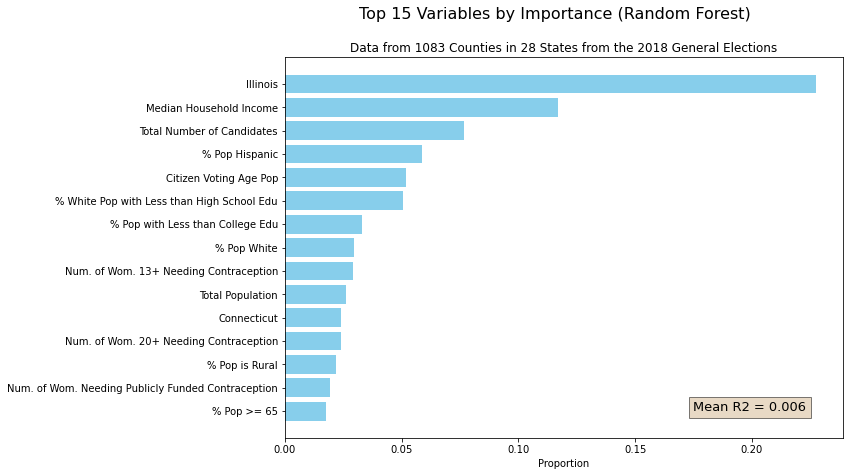

In [29]:
# plot 
fig1, ax = plt.subplots(figsize = (10,7))
plt.barh(var_imp_sorted['variable_clean'], var_imp_sorted['Importance'], color = 'skyblue')
plt.xlabel('Proportion')
plt.ylabel('')
plt.title('Data from 1083 Counties in 28 States from the 2018 General Elections')
plt.suptitle('Top 15 Variables by Importance (Random Forest)',fontsize=16)
plt.text(0.175, 0, 'Mean R2 = 0.006', fontsize=13, bbox=dict(facecolor='tan', alpha=0.5))
plt.show()

#fig1.savefig('variable_imp.png')